# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## **Importing necessary libraries and data**

In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
# %load_ext nb_black  # for jupyter notebooks
!pip install black[jupyter] --quiet # for v=google colab

import warnings
warnings.filterwarnings("ignore")


from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.4'

## **Loading the dataset**

In [ ]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data from file
visa = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Project 5/EasyVisa.csv')

# copying data to another varaible to avoid any changes to original data
data = visa.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Observations
- Sanity checks

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### **Number of unique values in each column**

In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

**Observation:**
- We can drop `case_id` column as it is an ID variable and will not add value to the model.

### **Number of observations in each category**

In [ ]:
cat_cols=['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

**Observation:**
- We have 6 unique continents and 66% of the employees originate from Asian continents.
- 40% of the employees filing for the labor certification have a Bachelor's degree and 38% have a Master's degree.
- Only 12% of the employees may need additional on job training.
- 90% of the employees are employeed full-time.
- 90% of the employees are annual salaried employees.
- Last but most importantly, 67% of the cases have been certified.


### **Checking the shape of the dataset**

In [ ]:
# View the shape of the dataset and count the number of rows and columns of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 25480 rows and 12 columns


**Observation:** There are 25,480 rows and 12 columns.

### **Checking the data types of the columns for the dataset**

In [ ]:
# Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observation:** All of the above datatypes are as expected.

### **Checking for missing values**

In [ ]:
# checking for null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observation:** There are missing values in many columns.

### **Checking for duplicate values**

In [ ]:
# Checking the for any duplicate records
data.duplicated().sum()

0

**Observation:** The dataset doesn't contain any duplicate values.

### **Dropping Case_ID column from the dataset**

In [ ]:
# Checking for unique booking id values
data.case_id.nunique()

25480

* The `CASE_ID` column contains only unique values, so we can drop it

In [ ]:
data = data.drop(["case_id"], axis=1)

### **Statistical summary of the dataset**

In [ ]:
# Obtaining statistical summary of numerical and categorical data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

1. **Below is the statistical summary:**

  1. **No. of employees** working for a company can be as high as 602,069 with an average no. employees at 5,667.
  2. **Prevalling Wage** can be as high as $\$$319,210 with an average salary of $\$$74,455.

2. **Data issues:**
  1.  We need to fix the negative employees within the dataset.

### **Check negative values in the employee column & treat them**

In [ ]:
neg_emp = data.loc[data['no_of_employees']<0]
print(f'There are {neg_emp.shape[0]} rows with negative number of employees')

There are 33 rows with negative number of employees


In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].abs()

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### **Univariate Analysis**

#### **Observations on number of employees**

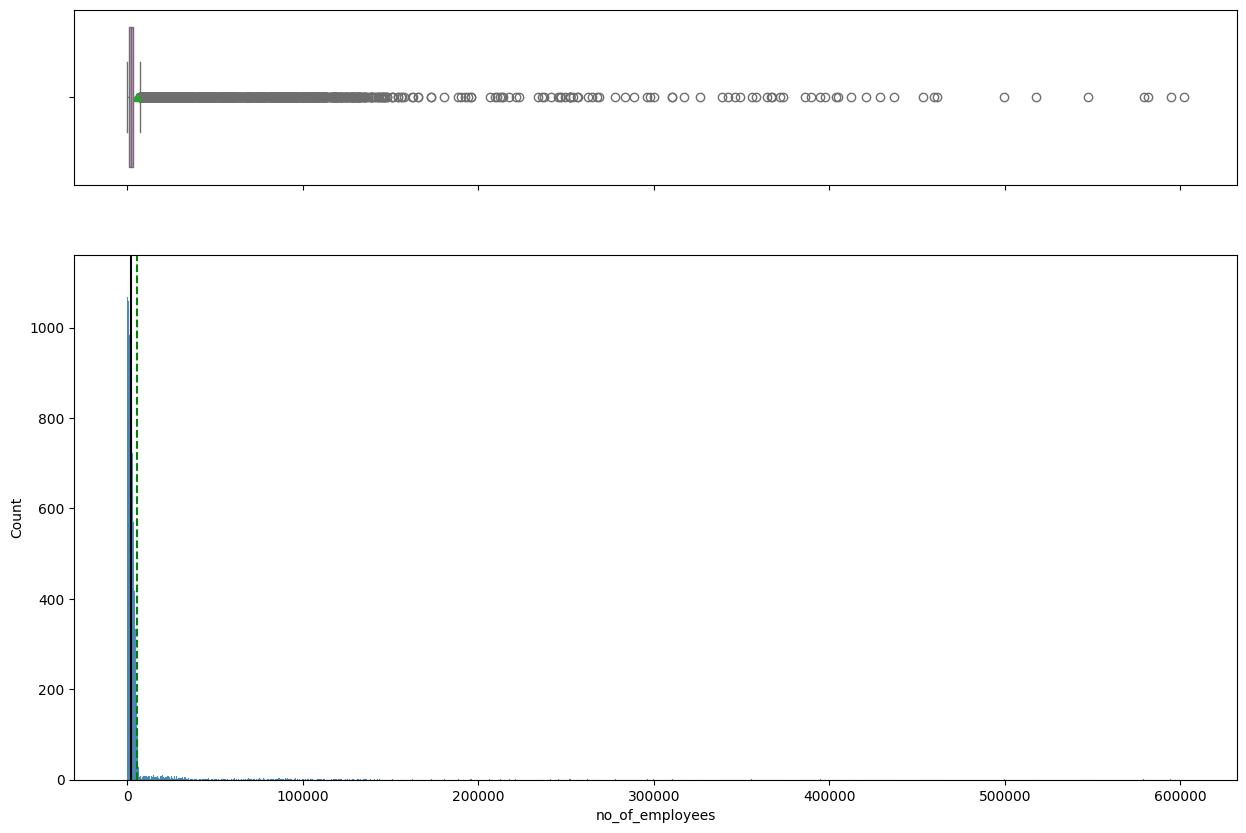

In [ ]:
histogram_boxplot(data, "no_of_employees")

**Observation:** Q3 of the IQR range for no_of_employees is at 3,500 employees. But, we have lot of companies with more than 3,500 employees.

#### **Observations on prevailing wage**

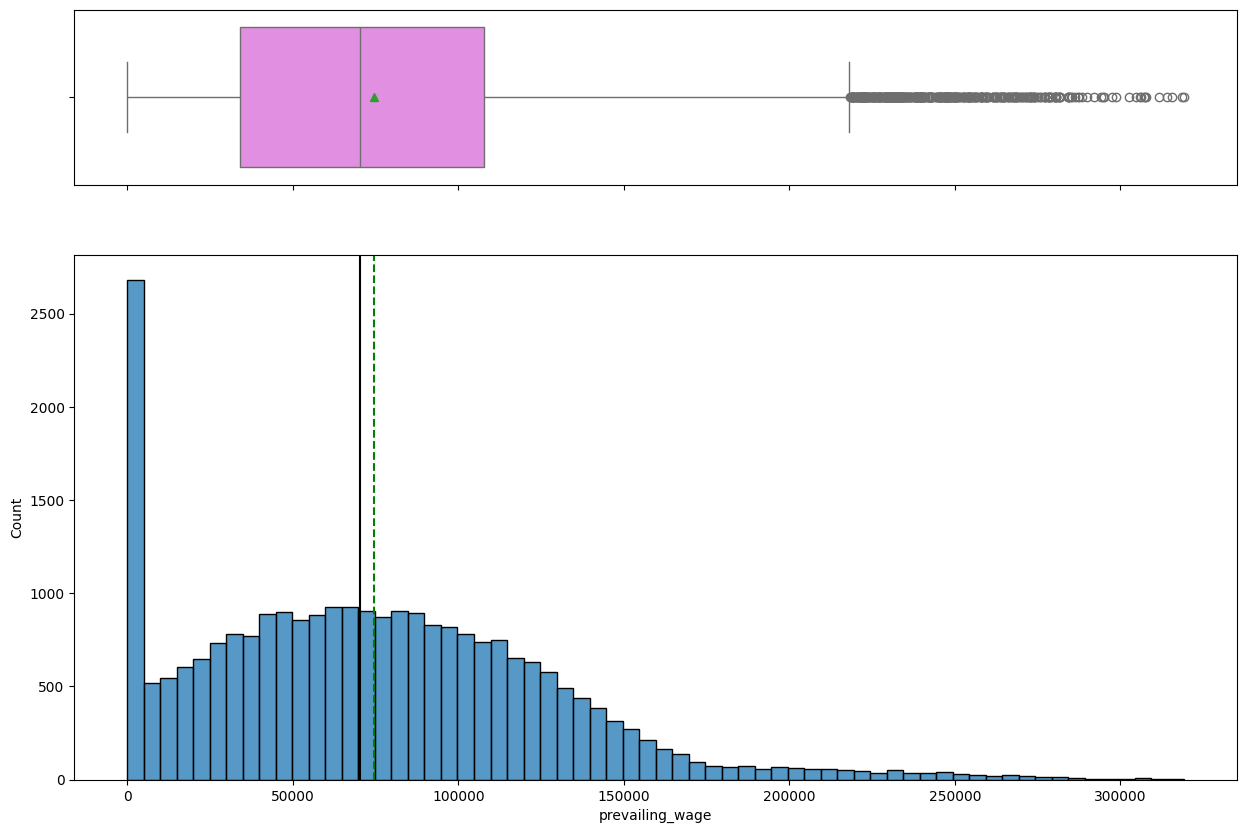

In [ ]:
histogram_boxplot(data, "prevailing_wage")

**Observation:**
* The `prevailing_wage` distribution is right skewed with median of $\$$70,308.
* Some of the `prevailing_wage` observations have a `prevailing_wage` less than $\$$100, it could possibly be hourly wages.

#### **Check the low `prevailing_wage` data within the dataset**

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage']<100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

**Observation:**
* As aper our earlier assumption some of the `prevailing_wage` observations that have a `prevailing_wage` less than $\$$100, are hourly wages.

#### **Observations on continent**

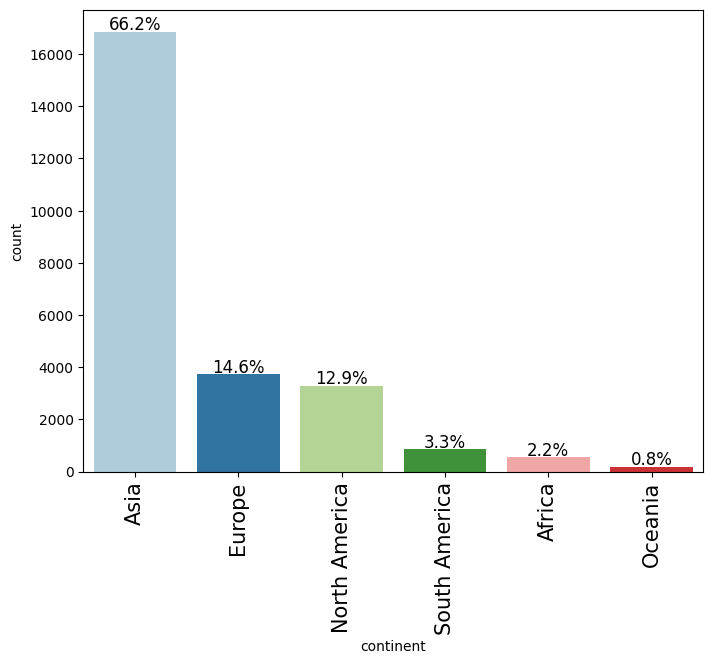

In [ ]:
labeled_barplot(data, "continent", perc=True)

**Observation:** 66% of the employees are from Asia continent followed by Europe and North America at 14.6% & 12.9% respectively.

#### **Observations on education of employee**

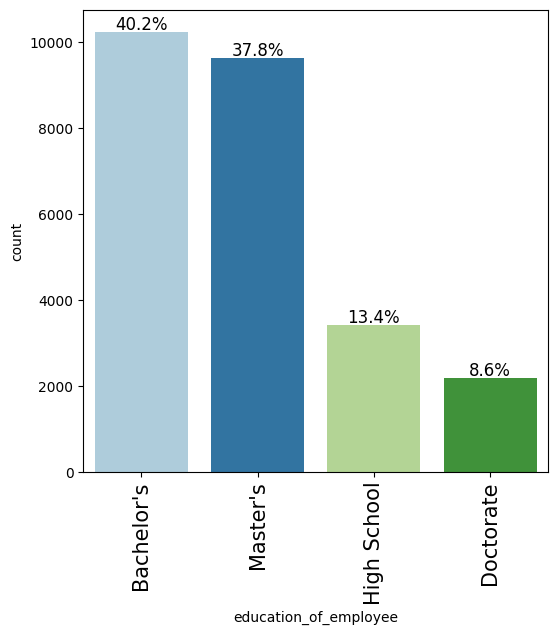

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observation:** 78% of the employees have a minimum of Bachelor's degree, with 37.8% having Master's.

#### **Observations on job experience**

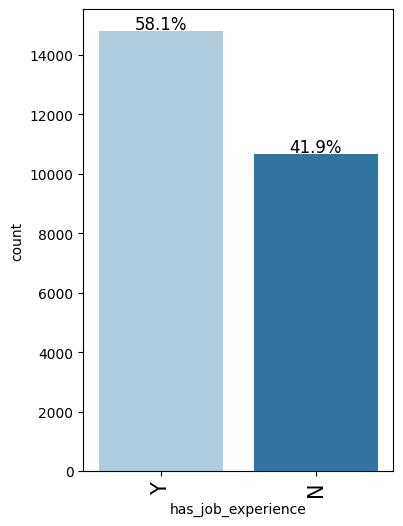

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observation:** 58% of the employees have previous worked elsewhere and have job experience.

#### **Observations on job training**

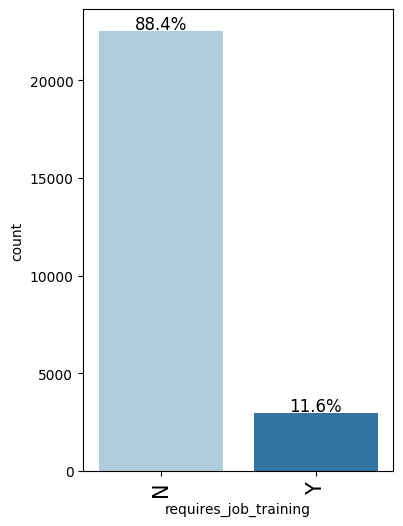

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observation:** 88% of the employees do not require any additional on job training.

#### **Observations on region of employment**

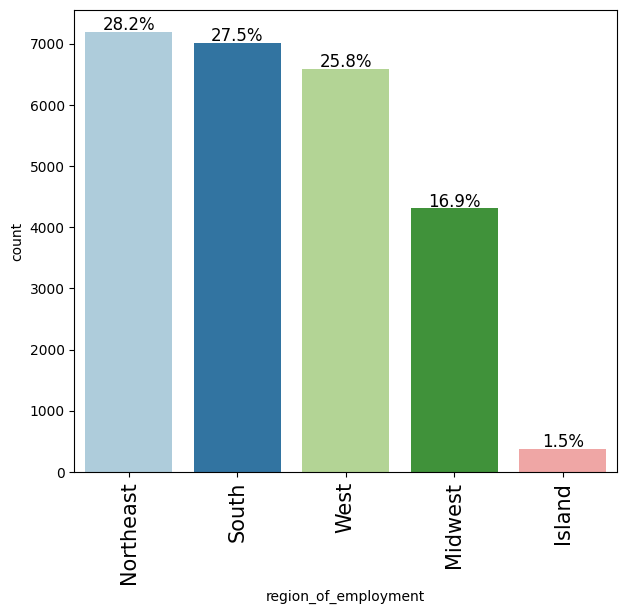

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observation:** 1/3 of the employees within the dataset are located across Northeast, South and Western part of the US.

#### **Observations on unit of wage**

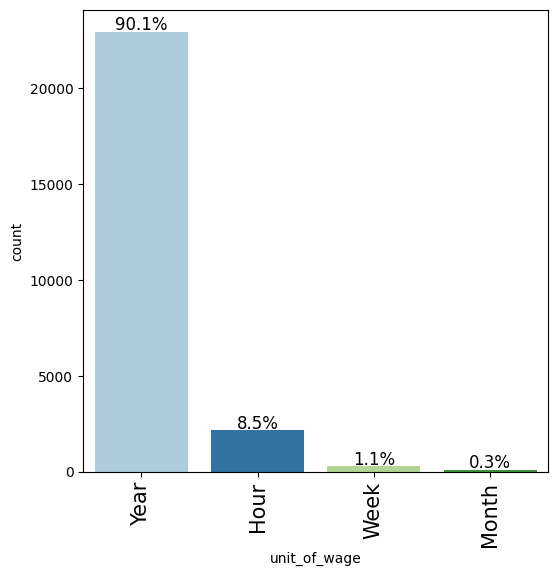

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

**Observation:** 90% of the employees are annual salaried employees.

#### **Observations on case status**

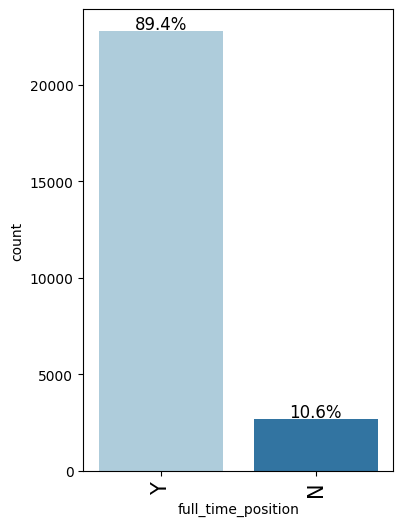

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)

**Observation:** 89% of the employees have a fll-time position with their employer.

#### **Observations on case status**

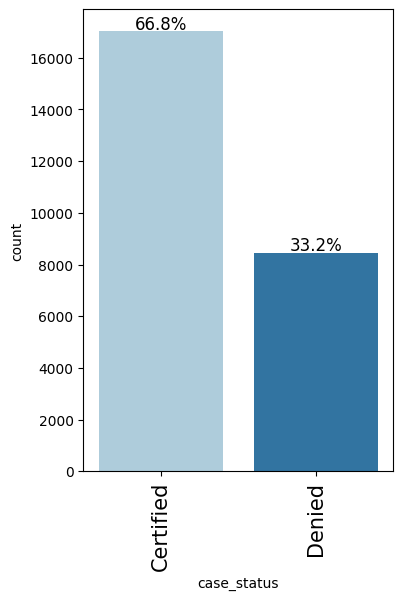

In [ ]:
labeled_barplot(data, "case_status", perc=True)

**Observation:** 67% of the employees have had their case certified, only 33% were denied.

### **Bivariate Analysis**

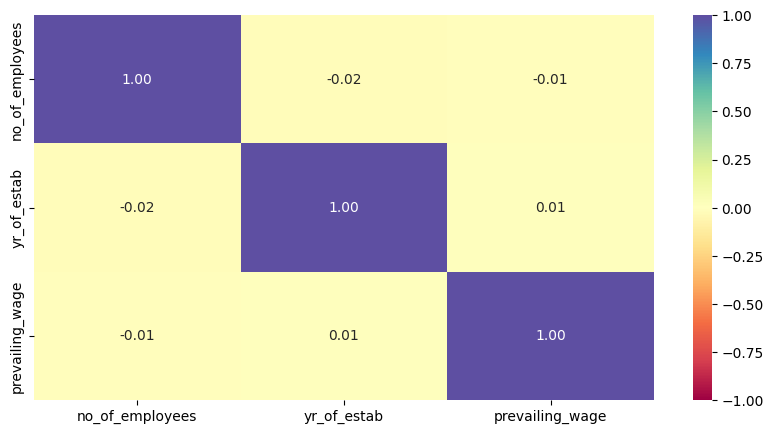

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:** As expected, we do not see any correlation between employees, prevailing wage and the year the company was established.

#### **Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification.**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


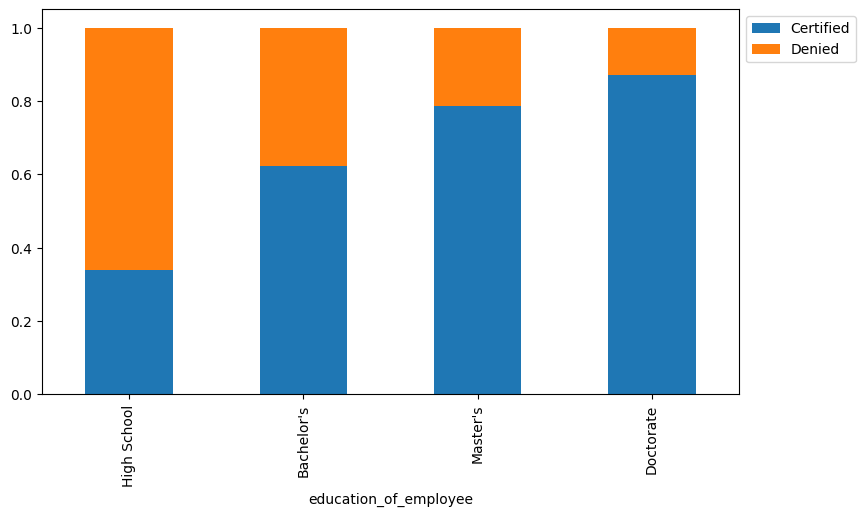

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

**Observation:** Looks like 80% of the employees had their cases certified who had higher education and traveled abroad for well-paid jobs.
* 87% of the employees that had Doctorate had their cases certified.
* 78% of the employees that had Master's had their cases certified.

#### **Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further.**

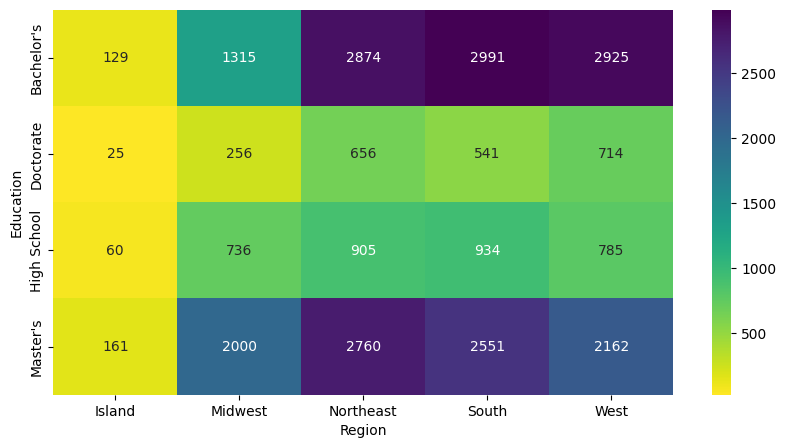

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.education_of_employee,data.region_of_employment), annot=True, fmt="g", cmap="viridis_r")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show();

**Observation:**
* West, Midwest, South and Northeast regions attracts employees with a minimum of Bachelor's and above.
* Island region attracts employees with all educational backgrounds.

#### **Let's have a look at the percentage of visa certifications across each region.**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


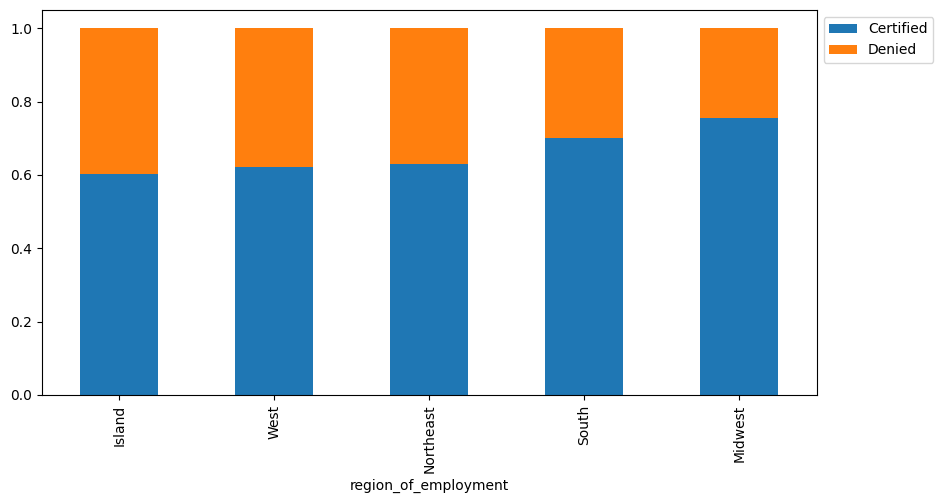

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

**Observation:**
* Employees working in **Island** region had 60% of their cases certified.
* Employees working in **West** region had 62% of their cases certified.
* Employees working in **Northeast** region had 63% of their cases certified.
* Employees working in **South** region had 70% of their cases certified.
* Employees working in **Midwest** region had 76% of their cases certified.

#### **How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


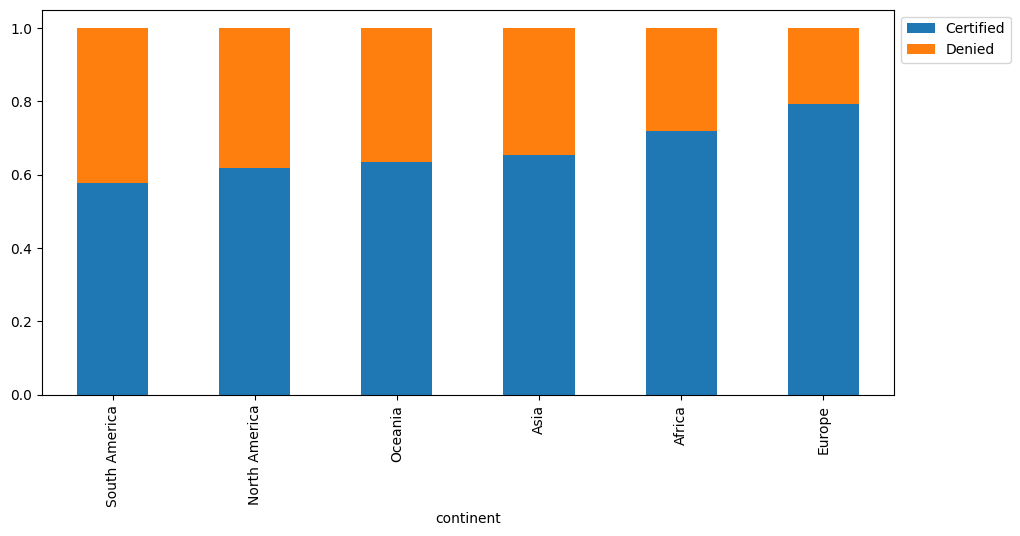

In [ ]:
stacked_barplot(data, "continent", "case_status")

**Observation:**
* Employees from **South America** continent had a 58% of their cases certified.
* Employees from **North America** continent had a 62% of their cases certified.
* Employees from **Oceania** continent had a 64% of their cases certified.
* Employees from **Asia** continent had a 65% of their cases certified.
* Employees from **Africa** continent had a 72% of their cases certified.
* Employees from **Europe** continent had a 79% of their cases certified.

#### **Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


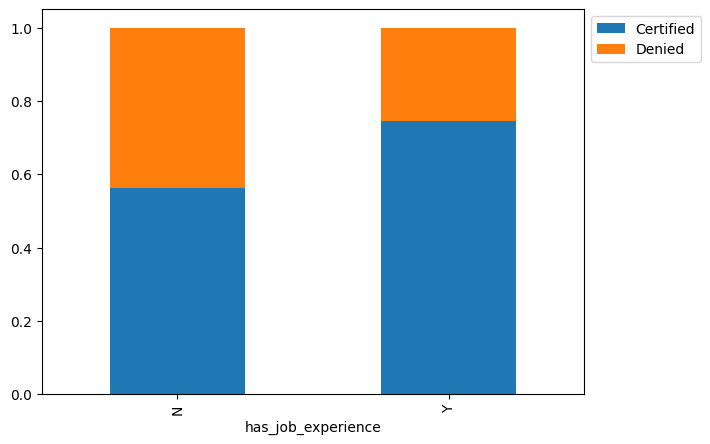

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

**Observation:**
* Employees that had previous work experience had 74% of their cases certified.
* Employees that did not have any previous work experience had only 56% of their cases certified.

#### **Do the employees who have prior work experience require any job training?**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


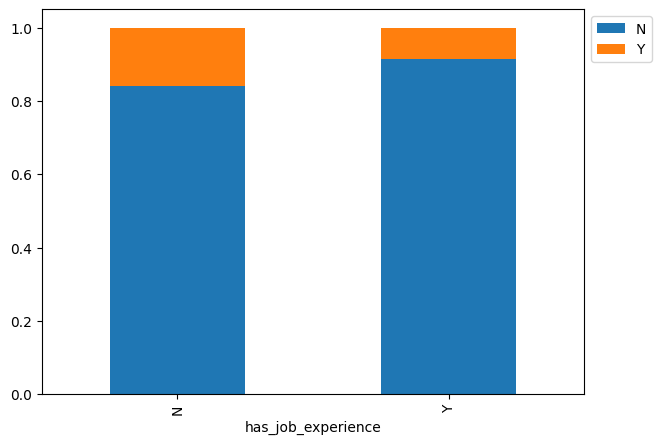

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

**Observation:**
* 91% of the employees that had previous work experience did not require on the job training.
* 84% of the employees that did not have any previous work experience too did not require on the job training.

#### **The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

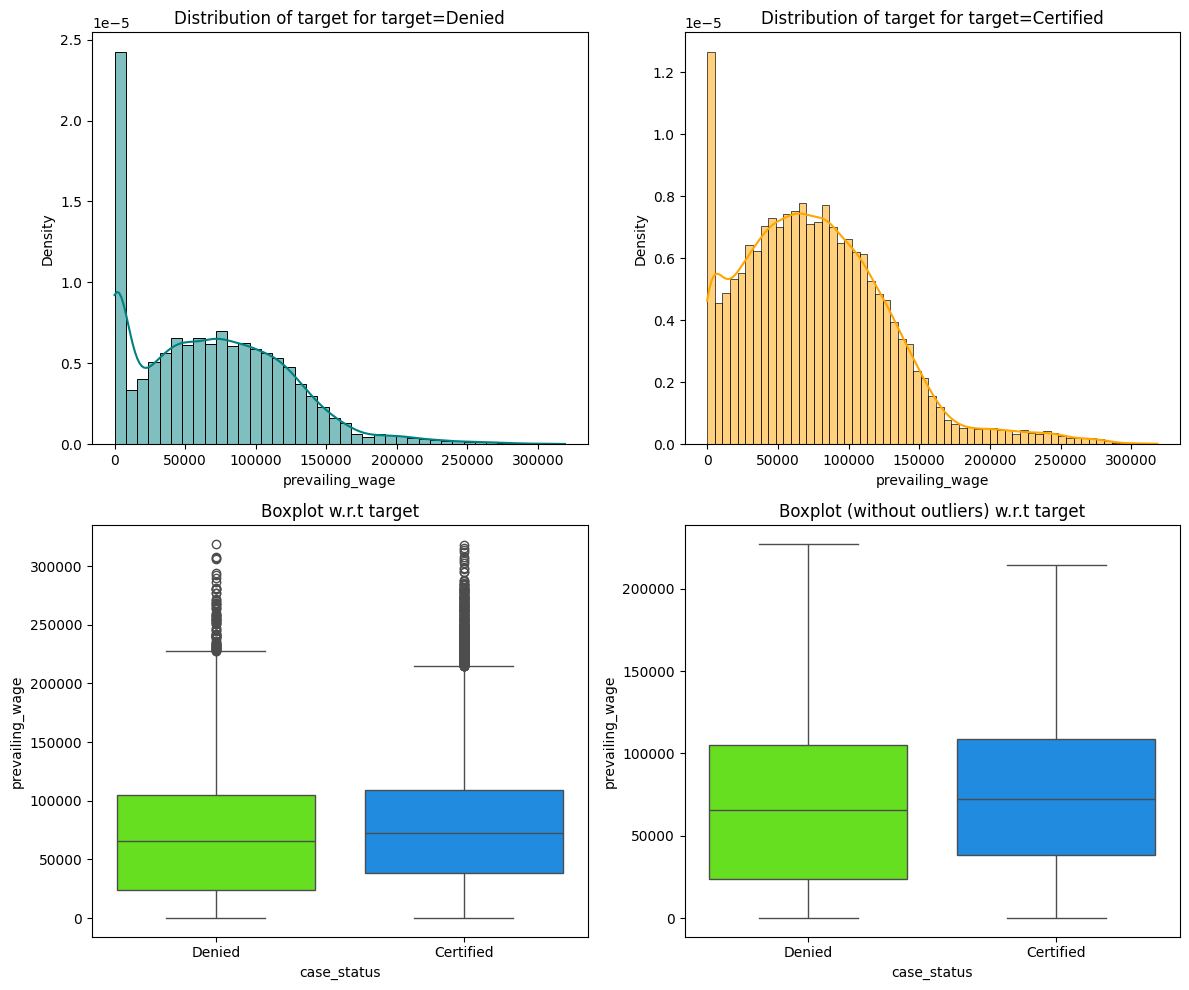

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

**Observation:**
* As see from above, cases with a slightly higher prevailing wages have a slightly higher chance of getting certified.

#### **Checking if the prevailing wage is similar across all the regions of the US**

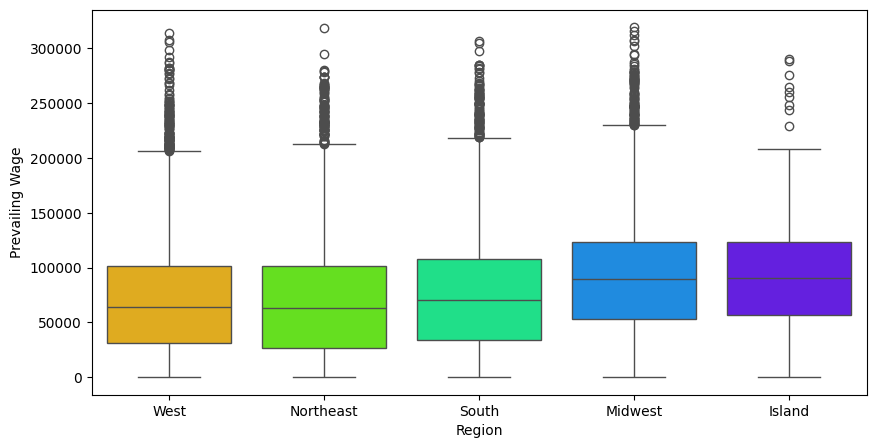

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data, palette="gist_rainbow")
plt.ylabel("Prevailing Wage")
plt.xlabel("Region")
plt.show();

**Observation:**
* Island and Midwest regions have a higer median of prevailing wages compared to other regions.

#### **In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


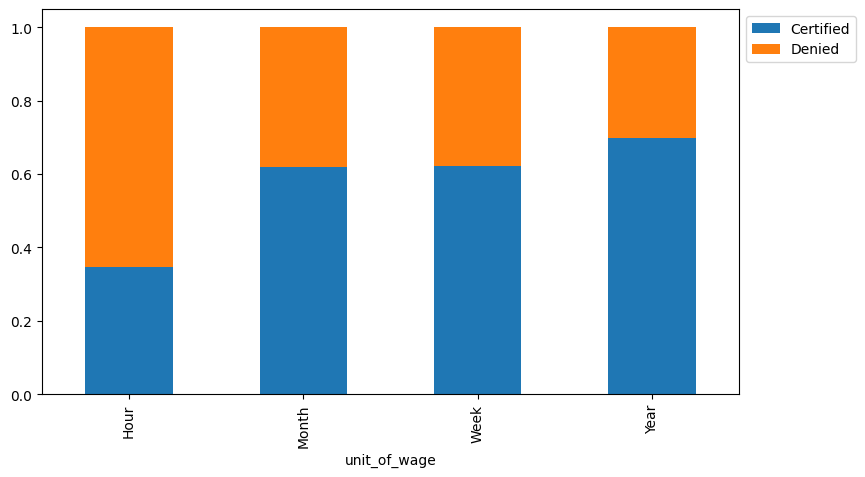

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Observation:**
* Employees that were on **Hourly** wages had merely 35% of their cases certified.
* Employees that were on **Monthly** wages had 62% of their cases certified.
* Employees that were on **Weekly** wages had 62% of their cases certified.
* Employees that were on **Yearly** wages had 70% of their cases certified.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Detection and Treatmaent

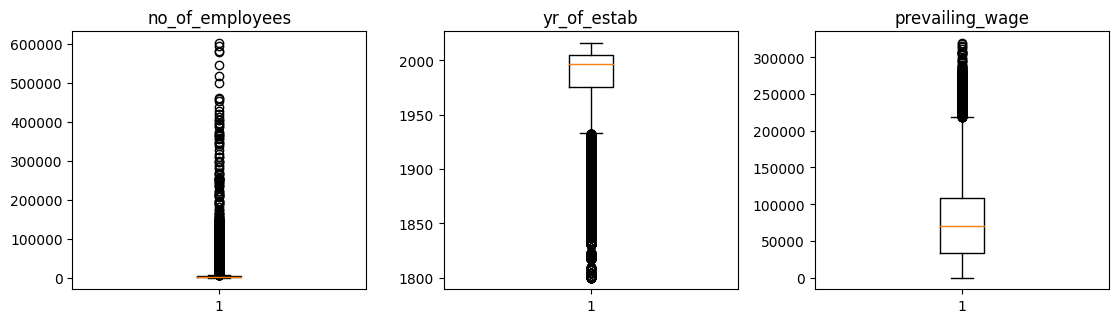

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Encoding the categorical feature & separating features and the target column
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop('case_status', axis=1)
Y = data['case_status']


X = pd.get_dummies(X, drop_first=True)

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


**Observation:** We see that around 66.7% of observations belongs to class 1 (Certified) and 33.2% observations belongs to class 0 (Denied), and this is preserved in the train and test sets

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

In [ ]:
#Fitting the model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


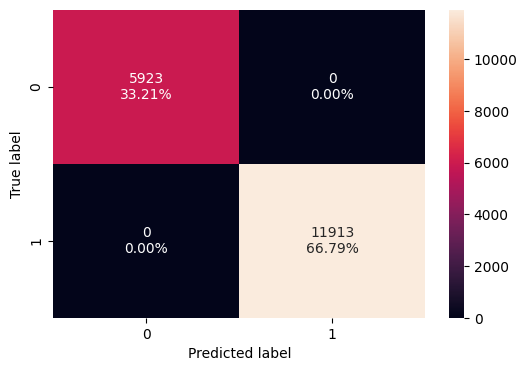

In [ ]:
#Calculating different metrics
model_train_perf=model_performance_classification_sklearn(model,X_train,y_train)
print("Training performance:\n",model_train_perf)

#Creating confusion matrix and checking the model performance on training set
confusion_matrix_sklearn(model,X_train,y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


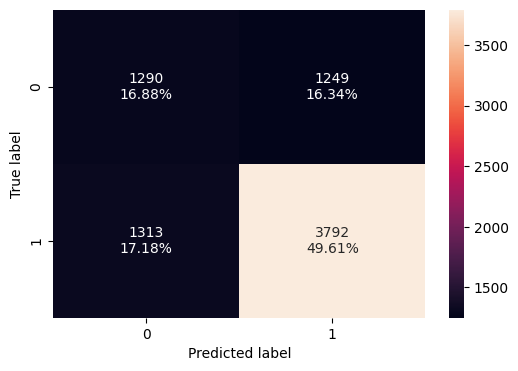

In [ ]:
#Calculating different metrics
model_test_perf=model_performance_classification_sklearn(model,X_test,y_test)
print("Testing performance:\n",model_test_perf)

#Creating confusion matrix and checking the model performance on training set
confusion_matrix_sklearn(model,X_test,y_test)

**Observation:**
* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1). # or class_weight="balanced"

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=4,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.678908  0.995803    0.67634  0.805555


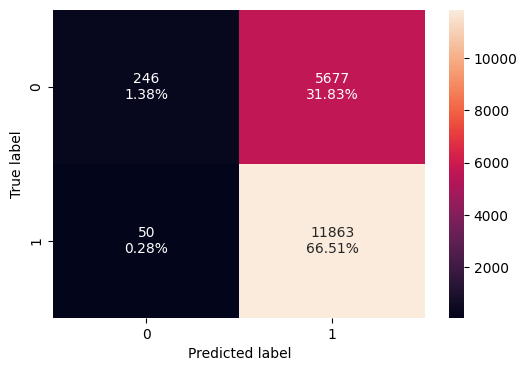

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.674516  0.994711   0.673564  0.803227


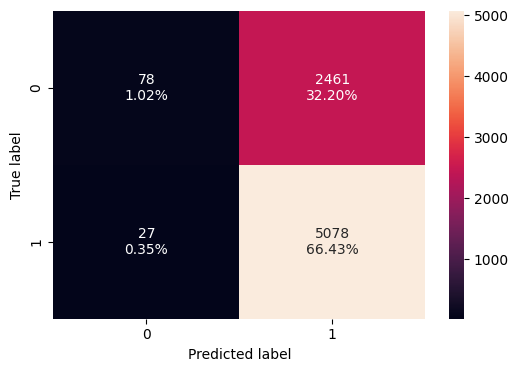

In [ ]:
#Calculating different metrics
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

**Observation:**
* The overfitting has reduced and the test f1-score has improved.
* Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


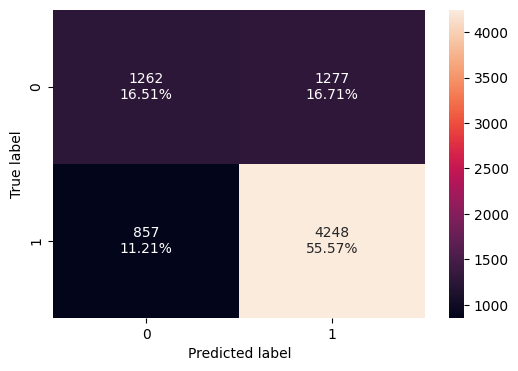

In [ ]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


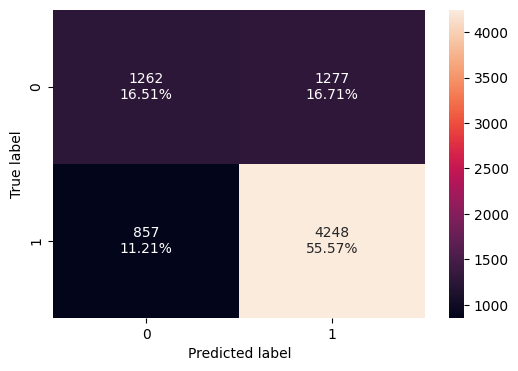

In [ ]:
#Calculating different metrics
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

**Observation:**
* Random forest is giving a similar f1-score to the decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_samples=0.4,
                       min_samples_leaf=2, n_estimators=25, oob_score=True,
                       random_state=1)

#### Checking model performance on training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.784537  0.985982   0.761639  0.859411


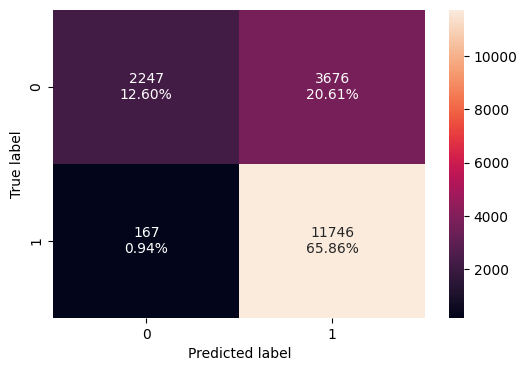

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_train,y_train)


#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.715725  0.944368    0.71848  0.816081


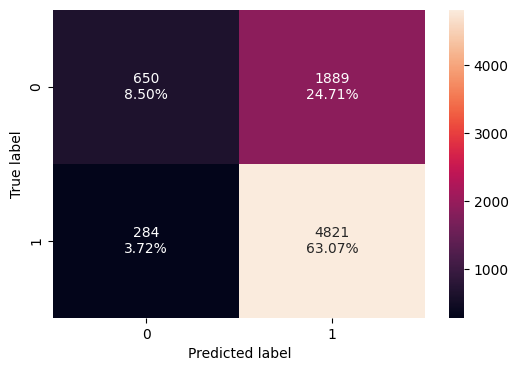

In [ ]:
#Calculating different metrics
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

**Observation:**
* The overfitting has reduced significantly and the model performance has improved.
* The test recall (may still be over fitting) and test f1-score have increased.

### Bagging Classifier

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


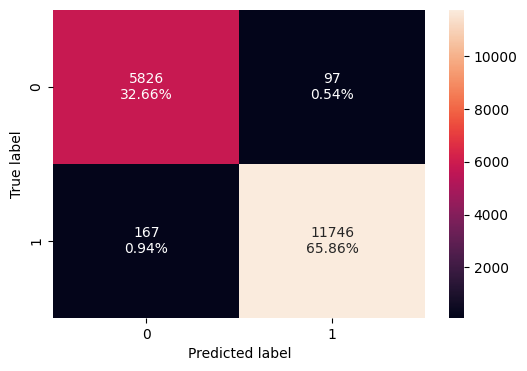

In [ ]:
#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

#### Checking model performance on test set

   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


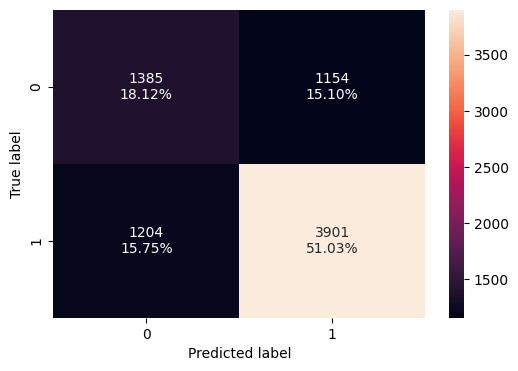

In [ ]:
#Calculating different metrics
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

**Observation:**
* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

#### Checking model performance on training set

   Accuracy    Recall  Precision        F1
0   0.99871  0.999916   0.998157  0.999036


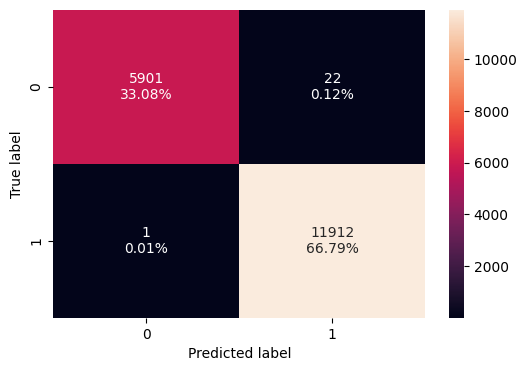

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_train, y_train)

#### Checking model performance on test set

   Accuracy    Recall  Precision        F1
0  0.725929  0.888737   0.748186  0.812427


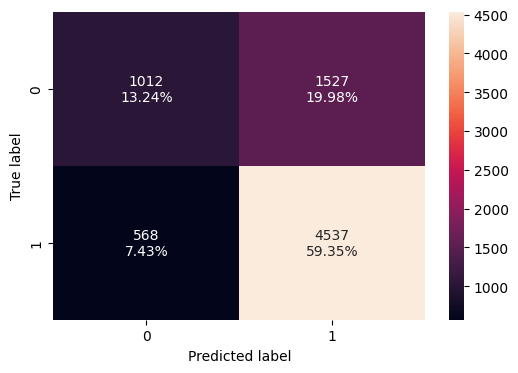

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

**Observation:**
* Surprisingly, the model still overfits on the training data.
* Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


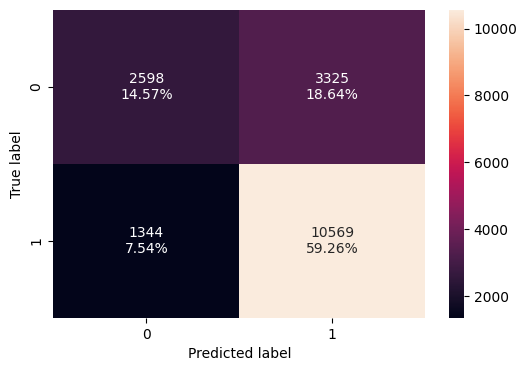

In [ ]:
#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

#### Checking model performance on test set

   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


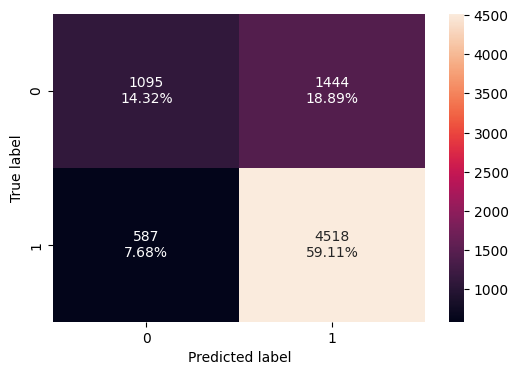

In [ ]:
#Calculating different metrics
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

**Observation:**
* Adaboost is giving more better performance than previous models.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

#### Checking model performance on training set

   Accuracy    Recall  Precision        F1
0  0.754317  0.889365   0.775679  0.828641


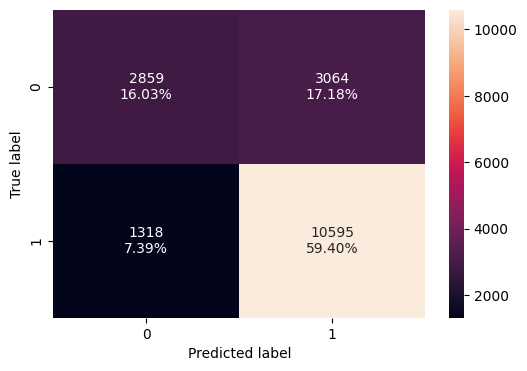

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_train, y_train)

#### Checking model performance on test set

   Accuracy    Recall  Precision        F1
0   0.74045  0.881293   0.765527  0.819341


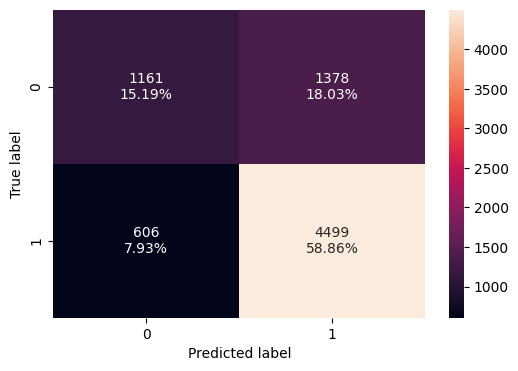

In [ ]:
#Calculating different metrics
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

**Observation:**
* The model performance has only improved slightly.
* Lets try other boosting techniques.

### Gradient Boosting Classifier

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


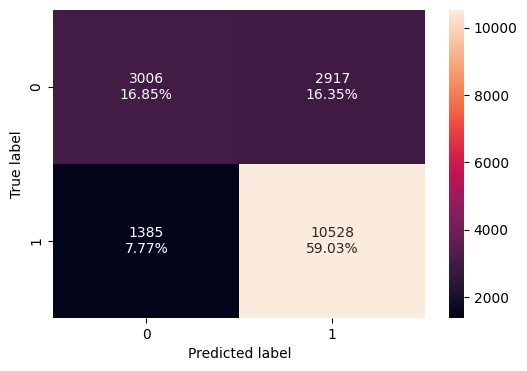

In [ ]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


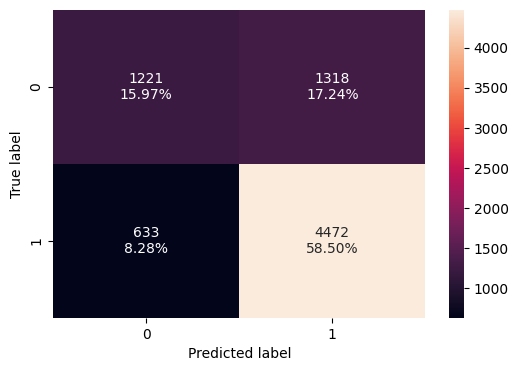

In [ ]:
#Calculating different metrics
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

**Observation:**
* The gradient boosting classifier has performed better than Adaboost.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753756  0.883992   0.777712  0.827453


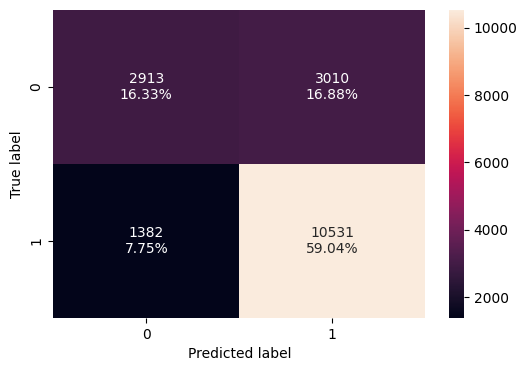

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_train, y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742936  0.878355   0.769389  0.820269


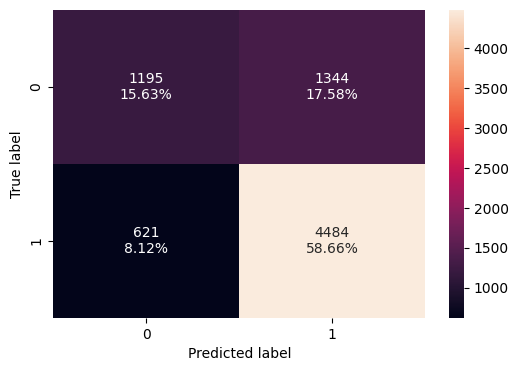

In [ ]:
#Calculating different metrics
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

**Observation:**
* There is not much difference in the model performance after hyperparameter tuning.

### XGBoost Classifier

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


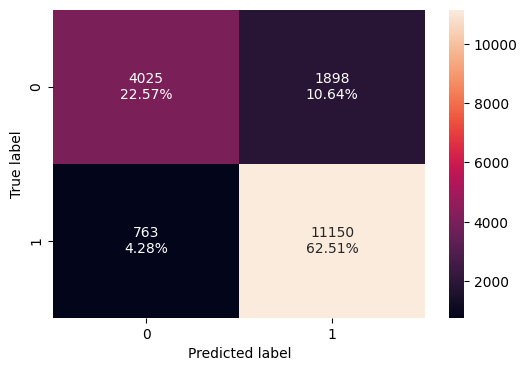

In [ ]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


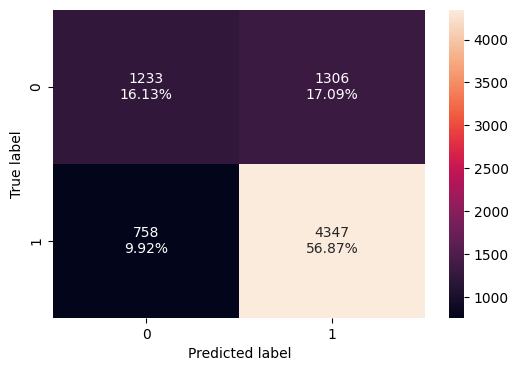

In [ ]:
#Calculating different metrics
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

**Observation:**
* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters ={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

Training performance:
    Accuracy    Recall  Precision        F1
0   0.76211  0.888189   0.784243  0.832986


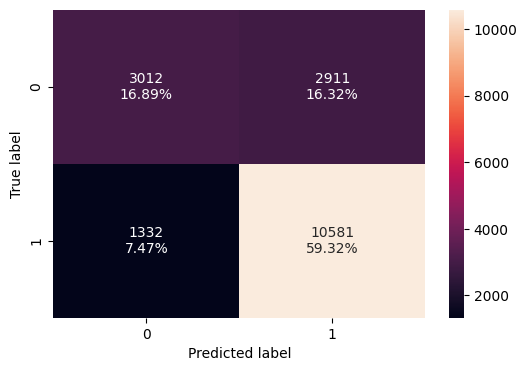

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_train, y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744898  0.877767   0.771655  0.821298


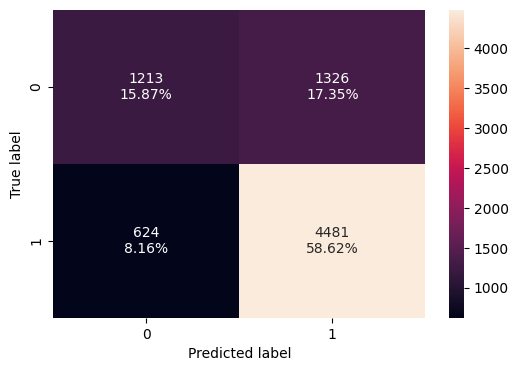

In [ ]:
#Calculating different metrics
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

**Observation:**
* The overfitting has reduced and the model performance has improved.

## Stacking Model

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_samples=0.4,
                                                       min_samples_leaf=2,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Checking model performance on training set

Training performance:
    Accuracy   Recall  Precision        F1
0  0.772483  0.89927   0.789404  0.840763


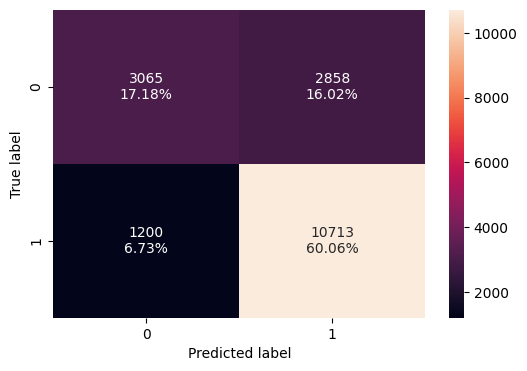

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

#### Checking model performance on test set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745029  0.881489   0.770021  0.821993


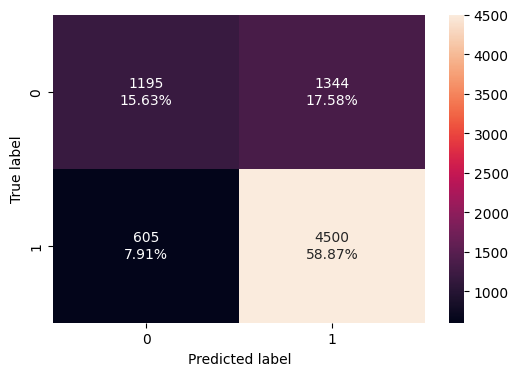

In [ ]:
#Calculating different metrics
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Observation:**
* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.678908,0.999944,0.784537,0.985198,0.998710,0.738226,0.754317,0.758802,0.753756,0.850807,0.762110,0.772483
Recall,1.0,0.995803,0.999916,0.985982,0.985982,0.999916,0.887182,0.889365,0.883740,0.883992,0.935952,0.888189,0.899270
Precision,1.0,0.676340,1.000000,0.761639,0.991810,0.998157,0.760688,0.775679,0.783042,0.777712,0.854537,0.784243,0.789404
F1,1.0,0.805555,0.999958,0.859411,0.988887,0.999036,0.819080,0.828641,0.830349,0.827453,0.893394,0.832986,0.840763


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.674516,0.720827,0.715725,0.691523,0.725929,0.734301,0.740450,0.744767,0.742936,0.729984,0.744898,0.745029
Recall,0.742801,0.994711,0.832125,0.944368,0.764153,0.888737,0.885015,0.881293,0.876004,0.878355,0.851518,0.877767,0.881489
Precision,0.752232,0.673564,0.768869,0.718480,0.771711,0.748186,0.757799,0.765527,0.772366,0.769389,0.768972,0.771655,0.770021
F1,0.747487,0.803227,0.799247,0.816081,0.767913,0.812427,0.816481,0.819341,0.820927,0.820269,0.808143,0.821298,0.821993


**Observation**
* Random Forest, Bagging & XGBoost Classifier models are overfitting the training data in terms of f1-score.
* The XGBoost classifier is giving the highest f1-score on the test data but is slightly overfitting the training data.
* The Gradient Boost classifier and the Stacking classifier have given second highest test f1-score and are giving a more generalized performance as compared to the other models.

### Feature importance of Tuned Gradient Boost Classifier

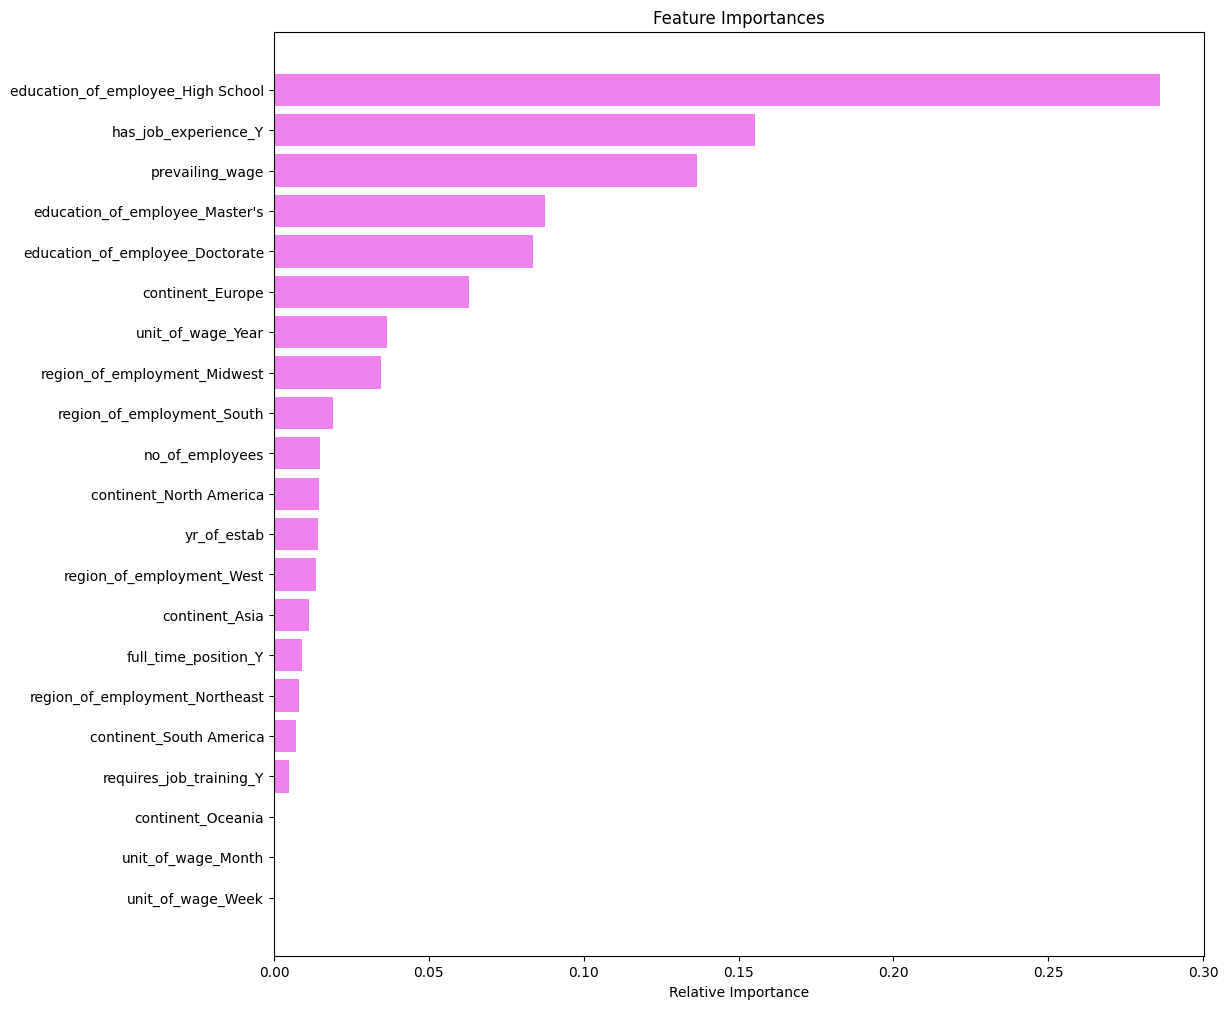

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**
* Employee education followed by history of previous work experience and prevailing wages are few of the important features in determining whether the case gets certified or not.

## Actionable Insights and Recommendations

#### **Insights:**

We analyzed a dataset of nearly 25,480 cases for temporary and permanent labor certifactions. The data contains the different attributes of the employee and the employer that are filing for the labor certification. Below are some of the insights surfaced within the dataset:
- We have 6 unique continents and 66% of the employees originate from Asian continents.
- 40% of the employees filing for the labor certification have a Bachelor's degree and 38% have a Master's degree.
- Only 12% of the employees may need additional on job training.
- 90% of the employees are employeed full-time.
- 90% of the employees are annual salaried employees.
- Last but most importantly, 67% of the cases have been certified.
  - Employees working in Midwest region had 76% approval rate, highest compared to all other regions.
  - Employees originating from Europe continent had 79% approval rate, highest compared to all other continents.
  - Employees having prior work experience had 74% approval rate.
  - Employees that were annual salaried employees had 70% approval rate, highest compared to all other wage types.


After developing a ML-based solution, the main features infuencing whether a labor certification case would be certified or denied are:
- Employee education
- Previous job/work experience and
- Prevailing wage.

#### **Conclusions:**

1. We have been able to build a predictive model using Gradient Boost classifier, that can be used by the Office of Foreign Labor Certification (OFLC) to identify whether the labor certification case be certified or denied with an f1_score of 0.83 on the training and 0.82 on the testing set.

2. Similarly, we also had some other models like XGBoosr Classifier Tuned and Stacking Classifier with similar f1_score, but choose the Gradient Boost classifier as it is giving us more generalized performance as compared to other models.

#### **Recommendations:**

To be eligibe for positions for temporary and permanent labor certifications a suitable profile should have a minimum of below attributes:

1. **Education Profile:** a nonimmigrant employee must either have a bachelor's degree in a relevant field with or without work experience or its equivalent of a minimum high-school degree with 4+ years of relevant experience.

2. **Previous Work experience:** a nonimmigrant employee must have minimum of 4 years of relevant experience if he/she has only a high-school degree. Also, the employee must have previous work experience if required by the job and should be listed our clearly by the employer.

3. **Prevailing wage Determination:** Employer should have filed for and must submit prevailing wage determination approval noitice provided by the Department of Labor (DOL). This will ensure that the nonimmigrant workes are paid on par with U.S. workers and not exploited by employers as cheap labor.




## Appendix

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```